<hr/>

# Intro to Data Science


- **Classifier comparison**

- **Classification**: Decision Tree, Random Forest, Logistic Regression Classifiers

## 1: Comparison of Classifiers

Go to http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and modify the code to run all classifiers that we learned so far.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [3]:
names = ["Nearest Neighbors","Decision Tree", "Random Forest", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape) # this is to add uniform random error to X
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

# make_classification, make_moons, make_circles give an array of data (w 2 features)
# and their classifications

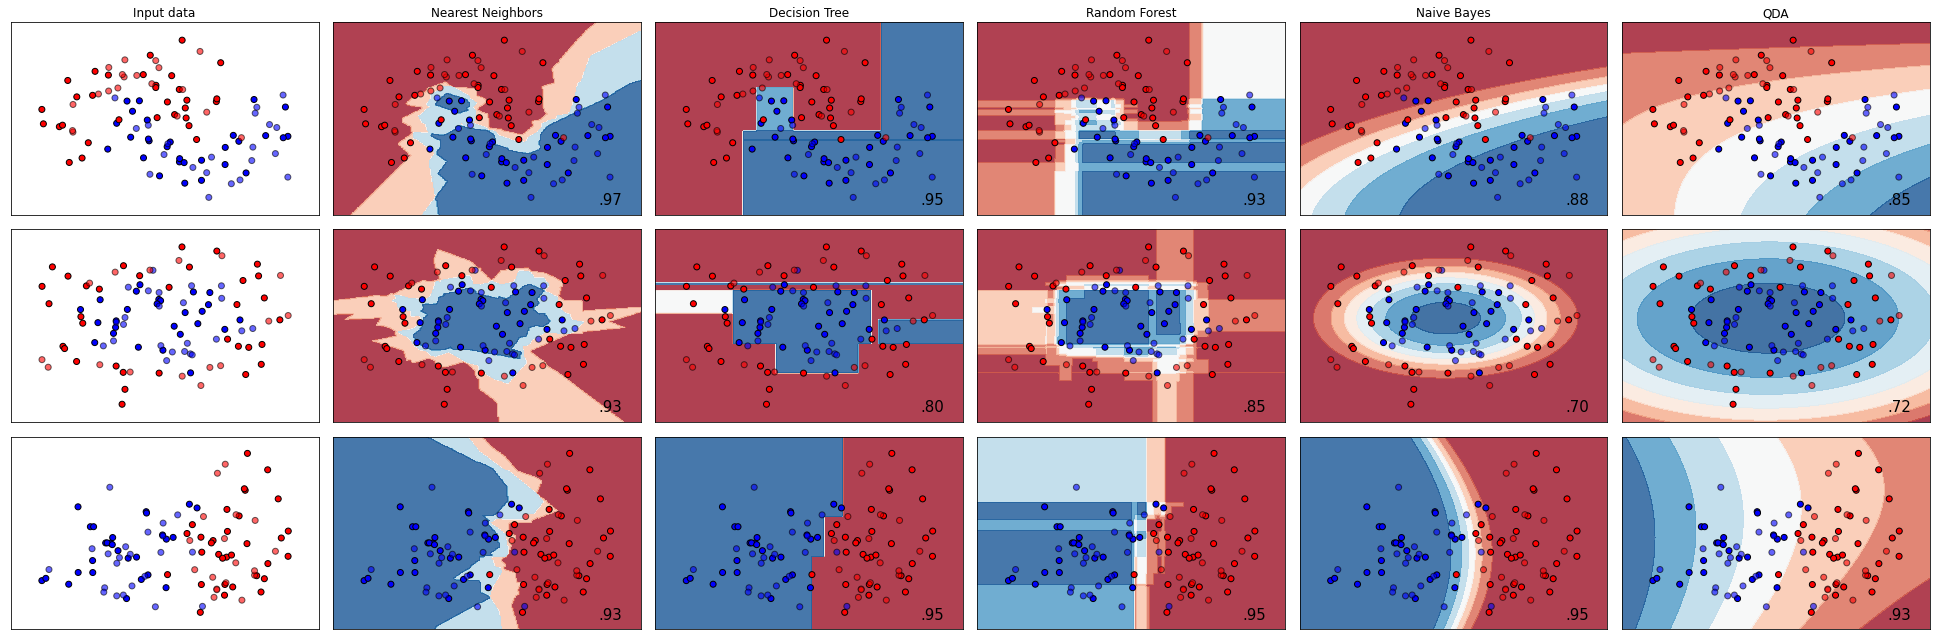

In [4]:
fig = plt.figure(figsize=(27, 9))
i = 1
h = .02  # step size in the mesh

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    # X is the data, y is the class
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    # this split arrays or matrices into random train and test subsets
    # test_size gives us the proportion that is used to test

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # creates the mesh grid

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # each dataset is a row, original data + classifier is each column
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    # the testing points are lighter coz they have alpha = 0.6, same color plot used
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1 
    # this is to first finish the plotting of dataset

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        # loop through each in name and classifers one corresponding to the other
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # fit the training set with the classifier and score the test set


        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            # if clf has the attribution "decision_function"
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            # use decision function to determine classes of the points
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
            # give the title the name of the classification if it's the first dataset
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        # at the proper position, wrte the score of the classifier
        i += 1

plt.tight_layout()
plt.show()

## 2. Random Forests

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive).

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those.

- A randomized tree will not be optimal but much faster to build!

### More on  Random Forest 
- Step 1: Create a  “bootstrap” dataset.
- Step 2: Create a decision tree using the bootstrapped dataset, but only use a random subset of variables at each step.
- Step 3: Go back to Step 1 and repeat.  You could do n times. 

- Bootstrapping & Bagging in Random Forest
- Where is the randomness?
- How to use it to classifier new data?
    - We assume that the user knows about the construction of single classification trees. Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest). 


- **Bootstrapping** means taking a sample of a population by drawing with replacement. It is one of the main ideas behind Bagging (which stands for Bootstrap AGGregatING).
- **Bagging** Bootstrapping the data plus using the aggregate to make a decision is called “bagging".

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree, cf. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html.

**Question:** Use wine from datasets.load_wine() and fit a random forest classifier on samples belonging to either of the first two classes. Provide a plot of the implied decision boundaries. Please print and plot also the importances of the features.

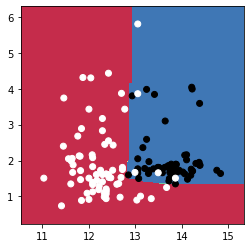

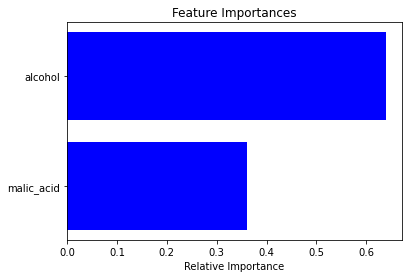

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets


#Load dataset
wine = datasets.load_wine()
X = wine.data[:,:2] # only first 2 features
c = wine.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]


# grid of points within the limits to evaluate
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]


# Fit random forest classifier
clf = RandomForestClassifier(n_estimators=200,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

# Plot the result
figure(figsize=(4,4))
contourf(x,y,z, cmap=plt.cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);


# Random forest generate feature importance
importances =clf.feature_importances_
indices = np.argsort(importances)
figure()

title('Feature Importances')
barh(range(len(indices)), importances[indices], color='b', align='center')
yticks(range(len(indices)), np.array(wine.feature_names)[np.argsort(importances)])
xlabel('Relative Importance')
plt.show()

In [6]:
importances

array([0.63939455, 0.36060545])

By selecting the first two features, we choose the features 'alcohol' and 'malic_acid'. Their importance of alcohol is 0.71085721, and the importance of malic acid is 0.28914279.

## 3. Logistic Regression

Logistic regression is a classification algorithm rather than a regression algorithm. Based on a given set of independent variables, it is used to estimate discrete value (0 or 1, yes/no, true/false). It is also called logit or MaxEnt Classifier.
Basically, it measures the relationship between the categorical dependent variable and one or more independent variables by estimating the probability of occurrence of an event using its logistics function.

Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

**Question:** Plot below a the decision boundaries of a logistic regression classifier based on the first two features (alcohol and malic acid) of the wine dataset. Color the datapoints according to their labels.

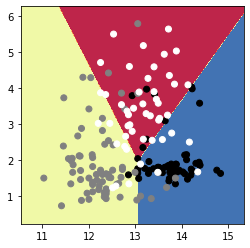

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
wine = datasets.load_wine()
X = wine.data[:, :2]  # we only take the first two features.
Y = wine.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

figure(figsize=(4,4))
contourf(xx,yy,Z, cmap=plt.cm.Spectral_r)
scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.gray)
plt.show()